# Examining Features thats impacts Warfarin Does with Freature Importance
---
## CATALOG

### 1. Load Data
### 2. Machine Learning Methods
### 3. Feature Importance
### 4. Analyze Feature Importance
### 5. Feature Selection Report for INR Prediction (Neural Network)
### 6. Save Training Data for Neural Network

---
# 1. Load Data
---

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/cleaned_data.csv', index_col='PharmGKB Subject ID')
df

,Height (cm),Weight (kg),Subject Reached Stable Dose of Warfarin,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Diabetes,Congestive Heart Failure and/or Cardiomyopathy,Valve Replacement,Aspirin,Acetaminophen or Paracetamol (Tylenol),...,Gender_male,Age_10 - 19,Age_20 - 29,Age_30 - 39,Age_40 - 49,Age_50 - 59,Age_60 - 69,Age_70 - 79,Age_80 - 89,Age_90+
PharmGKB Subject ID,,,,,,,,,,,,,,,,,,,,,
PA135312261,193.04,115.70,1.0,49.00,2.60,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PA135312262,176.53,144.20,1.0,42.00,2.15,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
PA135312263,162.56,77.10,1.0,53.00,1.90,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
PA135312264,182.24,90.70,1.0,28.00,2.40,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PA135312265,167.64,72.60,1.0,42.00,1.90,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA152407680,165.10,86.36,1.0,35.00,3.00,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
PA152407682,160.02,55.91,1.0,27.51,2.80,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
PA152407683,187.96,97.73,1.0,57.47,2.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3989 entries, PA135312261 to PA152407685
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Height (cm)                                     3989 non-null   float64
 1   Weight (kg)                                     3989 non-null   float64
 2   Subject Reached Stable Dose of Warfarin         3989 non-null   float64
 3   Therapeutic Dose of Warfarin                    3989 non-null   float64
 4   INR on Reported Therapeutic Dose of Warfarin    3989 non-null   float64
 5   Diabetes                                        3989 non-null   float64
 6   Congestive Heart Failure and/or Cardiomyopathy  3989 non-null   float64
 7   Valve Replacement                               3989 non-null   float64
 8   Aspirin                                         3989 non-null   float64
 9   Acetaminophen or Paracetamol 

---
# 2. Machine Learning Methods
---

In [4]:
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from typing import Dict

# Linear
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [5]:
RANDOM_STATE: int = 42
ALPHA: float = 0.1

MODELS: Dict = {
    'linear': {
        'linear': LinearRegression(),
        'ridge': Ridge(alpha=ALPHA),
        'lasso': Lasso(alpha=ALPHA),
        'EN': ElasticNet(alpha=ALPHA, l1_ratio=0.5),
    },
    'tree': {
        'GB': GradientBoostingRegressor(random_state=RANDOM_STATE),
        'RF': RandomForestRegressor(random_state=RANDOM_STATE),
        'ET': ExtraTreesRegressor(random_state=RANDOM_STATE),
        'DT': DecisionTreeRegressor(random_state=RANDOM_STATE),
        'XGB': XGBRegressor(random_state=RANDOM_STATE),
    },
}

In [6]:
def eval_model(y_test:pd.DataFrame, y_pred:pd.DataFrame):
    print("Model Performance".center(100, '-'))
    print("R² score:", r2_score(y_test, y_pred))
    print("RMSE:", root_mean_squared_error(y_test, y_pred))

In [7]:
def importance(model, X:pd.DataFrame, model_type=['linear', 'tree'], impt_dict=None, idx_name=None):
    if model_type == 'linear':
        importance = pd.DataFrame(model.coef_, index=X.columns, columns=['Importance'])
    elif model_type == 'tree':
        importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
    else:
        raise ValueError("Model type must be 'linear' or 'tree'")

    importance.sort_values(by='Importance', ascending=False, inplace=True)

    print("Feature Importances".center(100, '-'))
    print(f"{'Feature':<80} {'Importance':>15}")
    for i, row in importance.iterrows():
        print(f"{i:<80} {row['Importance']:>15.6f}")
    
    if impt_dict != None:
        if idx_name != None:
            impt_dict.setdefault('Model', [])
            impt_dict['Model'].append(idx_name)
        else:
            impt_dict.setdefault('Model', [])
            impt_dict['Model'].append(len(impt_dict['Model']) + 1)

        for i in importance.index:
            impt_dict.setdefault(i, [])
            impt_dict[i].append(importance.loc[i, 'Importance'])
        
        return impt_dict

In [8]:
def predict(X_train:pd.DataFrame, y_train:pd.DataFrame, X_test:pd.DataFrame, y_test:pd.DataFrame, importance_dict:Dict, model_name:str=['GB', 'RF', 'ET', 'DT', 'XGB', 'linear', 'ridge', 'lasso', 'EN'],):
    model_type = 'linear'

    try:
        model = MODELS[model_type][model_name]
    except KeyError:
        model_type = 'tree'
        model = MODELS[model_type][model_name]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    eval_model(y_test, y_pred)

    importance_dict = importance(
        model=model, 
        X=X_train, 
        model_type=model_type, 
        impt_dict=importance_dict, 
        idx_name=model_name
    )

    return importance_dict

---
# 3. Feature Importance
---

In [9]:
importance_dict = {}

## Tree Based

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    # df.drop(columns=['INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin', 'Subject Reached Stable Dose of Warfarin', 'Other']),
    df.drop(columns=['INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin', 'Subject Reached Stable Dose of Warfarin', 'Other']),
    df['INR on Reported Therapeutic Dose of Warfarin'],
    test_size=0.2,
    train_size=0.8,
    random_state=42,
)

### 1. Decision Tree Regressor

In [11]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='DT'
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.8795013202623889
RMSE: 0.6108314826943898
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.332274
Height (cm)                                                                             0.258158
Valve Replacement                                                                       0.034380
Afib/flutter                                                                            0.026609
Congestive Heart Failure and/or Cardiomyopathy                                          0.026086
Age_60 - 69                                                                             0.024800
Aspirin                                                         

### 2. Random Forest Regressor

In [12]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='RF',
)

-----------------------------------------Model Performance------------------------------------------
R² score: 0.04511752425001114
RMSE: 0.4353865982878567
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.327601
Height (cm)                                                                             0.252280
Afib/flutter                                                                            0.028603
Valve Replacement                                                                       0.028121
Aspirin                                                                                 0.024544
Age_60 - 69                                                                             0.024280
Congestive Heart Failure and/or Cardiomyopathy                  

### 3. Extra Trees Regressor

In [13]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='ET',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.1038324480503845
RMSE: 0.46811404694716024
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.262092
Height (cm)                                                                             0.221741
Afib/flutter                                                                            0.034307
Congestive Heart Failure and/or Cardiomyopathy                                          0.031032
Age_60 - 69                                                                             0.029139
Aspirin                                                                                 0.028519
Age_70 - 79                                                    

### 4. XGBoost Regressor

In [14]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='XGB',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.024417969390678973
RMSE: 0.4509606929757096
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Valve Replacement                                                                       0.070370
Gender_female                                                                           0.052817
Heart Valve                                                                             0.051373
Post-Orthopedic                                                                         0.046164
Acetaminophen or Paracetamol (Tylenol)                                                  0.043122
Age_30 - 39                                                                             0.040919
Pravastatin (Pravachol)                                       

### 5. Gradient Boosting Regressor

In [15]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='GB',
)

-----------------------------------------Model Performance------------------------------------------
R² score: 0.1301879768142692
RMSE: 0.41553996465697146
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Weight (kg)                                                                             0.399644
Height (cm)                                                                             0.151090
Valve Replacement                                                                       0.093384
Gender_female                                                                           0.041374
Gender_male                                                                             0.036341
Aspirin                                                                                 0.030165
Acetaminophen or Paracetamol (Tylenol)                          

## Non-Tree Based

#### Scale Data Value before Train Test Split

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

X_train, X_test, y_train, y_test = train_test_split(
    df_scaled.drop(columns=['INR on Reported Therapeutic Dose of Warfarin', 'Therapeutic Dose of Warfarin', 'Subject Reached Stable Dose of Warfarin', 'Other']),
    df_scaled['INR on Reported Therapeutic Dose of Warfarin'],
    test_size=0.2,
    train_size=0.8,
    random_state=42,
)

### 1. Linear Regressor

In [18]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='linear',
)

-----------------------------------------Model Performance------------------------------------------
R² score: 0.11428582484945315
RMSE: 0.11615547656402107
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.201501
Weight (kg)                                                                             0.158674
Rifampin or Rifampicin                                                                  0.083155
Fluvastatin (Lescol)                                                                    0.077330
Valve Replacement                                                                       0.072734
Cardiomyopathy/LV Dilation                                                              0.062925
Age_10 - 19                                                    

/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### 2. Ridge Regressor

In [19]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='ridge',
)

-----------------------------------------Model Performance------------------------------------------
R² score: 0.11433756896704494
RMSE: 0.11615208356739079
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.201059
Weight (kg)                                                                             0.158297
Fluvastatin (Lescol)                                                                    0.076063
Rifampin or Rifampicin                                                                  0.075154
Valve Replacement                                                                       0.072233
Cardiomyopathy/LV Dilation                                                              0.062808
Age_10 - 19                                                    

/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### 3. Lasso Regressor

In [20]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='lasso',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.0006597541134634177
RMSE: 0.12346279654017098
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.000000
Weight (kg)                                                                             0.000000
DVT                                                                                     0.000000
PE                                                                                      0.000000
Afib/flutter                                                                           -0.000000
Heart Valve                                                                             0.000000
Cardiomyopathy/LV Dilation                                  

/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


### 4. ElasticNet Regressor

In [21]:
importance_dict = predict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    importance_dict=importance_dict,
    model_name='EN',
)

-----------------------------------------Model Performance------------------------------------------
R² score: -0.0006597541134634177
RMSE: 0.12346279654017098
----------------------------------------Feature Importances-----------------------------------------
Feature                                                                               Importance
Height (cm)                                                                             0.000000
Weight (kg)                                                                             0.000000
DVT                                                                                     0.000000
PE                                                                                      0.000000
Afib/flutter                                                                           -0.000000
Heart Valve                                                                             0.000000
Cardiomyopathy/LV Dilation                                  

/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


---
# 4. Analyze Feature Importance
---

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def plot_importance(importance:pd.DataFrame, plot_type:str=['bar', 'box', 'top'], figsize:tuple=(17, 10),):
    mean_importance = importance.mean().sort_values(ascending=False)
    plt.figure(figsize=figsize)
    
    match plot_type:
        case 'bar':
            mean_importance.sort_values(ascending=False).plot(kind='bar')
            plt.title('Mean Feature Importance Across Models', size=20)
            plt.ylabel('Mean Importance', size=15)
            plt.xlabel('Feature', size=15)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        
        case 'box':
            sns.boxplot(data=importance[mean_importance.index])
            plt.title('Feature Importance Distribution (Boxplot)', size=20)
            plt.ylabel('Importance', size=15)
            plt.xlabel('Feature', size=15)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        
        case 'top':
            top_features = mean_importance.head(10).index
            importance[top_features].T.plot(kind='bar', figsize=figsize, width=1.2)

            plt.title('Top 10 Feature Importances by Model', size=20)
            plt.xlabel('Feature', size=15)
            plt.ylabel('Importance', size=15)
            plt.xticks(rotation=30, ha='right', size=15)
            plt.tight_layout()
            plt.show()

In [24]:
importance_df = pd.DataFrame(importance_dict)
importance_df.set_index('Model', inplace=True)
importance_df

,Weight (kg),Height (cm),Valve Replacement,Afib/flutter,Congestive Heart Failure and/or Cardiomyopathy,Age_60 - 69,Aspirin,Gender_female,Current Smoker,Age_70 - 79,...,Anti-fungal Azoles,Age_90+,Lovastatin (Mevacor),Phenytoin (Dilantin),Rosuvastatin (Crestor),Fluvastatin (Lescol),Sulfonamide Antibiotics,Macrolide Antibiotics,Rifampin or Rifampicin,Cerivastatin (Baycol)
Model,,,,,,,,,,,,,,,,,,,,,
DT,0.332274,0.258158,0.034380,0.026609,0.026086,0.024800,0.023224,0.022561,0.019654,0.018753,...,0.001152,0.001047,0.001044,0.001025,0.000587,0.000307,0.000110,0.000000,0.000000,0.000000e+00
RF,0.327601,0.252280,0.028121,0.028603,0.023337,0.024280,0.024544,0.018943,0.013059,0.023159,...,0.001249,0.001128,0.001329,0.000528,0.000961,0.000813,0.000523,0.000078,0.000032,0.000000e+00
ET,0.262092,0.221741,0.024404,0.034307,0.031032,0.029139,0.028519,0.019632,0.020102,0.026629,...,0.001605,0.001469,0.001935,0.000796,0.001625,0.001627,0.001135,0.000176,0.000030,0.000000e+00
XGB,0.034168,0.026216,0.070370,0.028462,0.026013,0.033375,0.028493,0.052817,0.024092,0.017583,...,0.013541,0.011871,0.016584,0.008487,0.011394,0.012432,0.020810,0.003721,0.001388,0.000000e+00
GB,0.399644,0.151090,0.093384,0.016693,0.021716,0.019793,0.030165,0.041374,0.005029,0.001325,...,0.002763,0.000000,0.000000,0.000000,0.000485,0.002133,0.000934,0.000000,0.000000,0.000000e+00
linear,0.158674,0.201501,0.072734,0.007936,-0.030874,-0.020084,0.017354,0.024222,0.007807,-0.005316,...,0.034616,0.012816,0.010136,-0.001490,-0.001869,0.077330,-0.029691,0.001868,0.083155,-4.163336e-17
ridge,0.158297,0.201059,0.072233,0.007941,-0.030854,-0.020030,0.017385,0.024170,0.007808,-0.005275,...,0.034901,0.012753,0.010088,-0.001509,-0.001819,0.076063,-0.029207,0.001865,0.075154,0.000000e+00
lasso,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000e+00
EN,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000e+00


## Bar Chart (Mean)

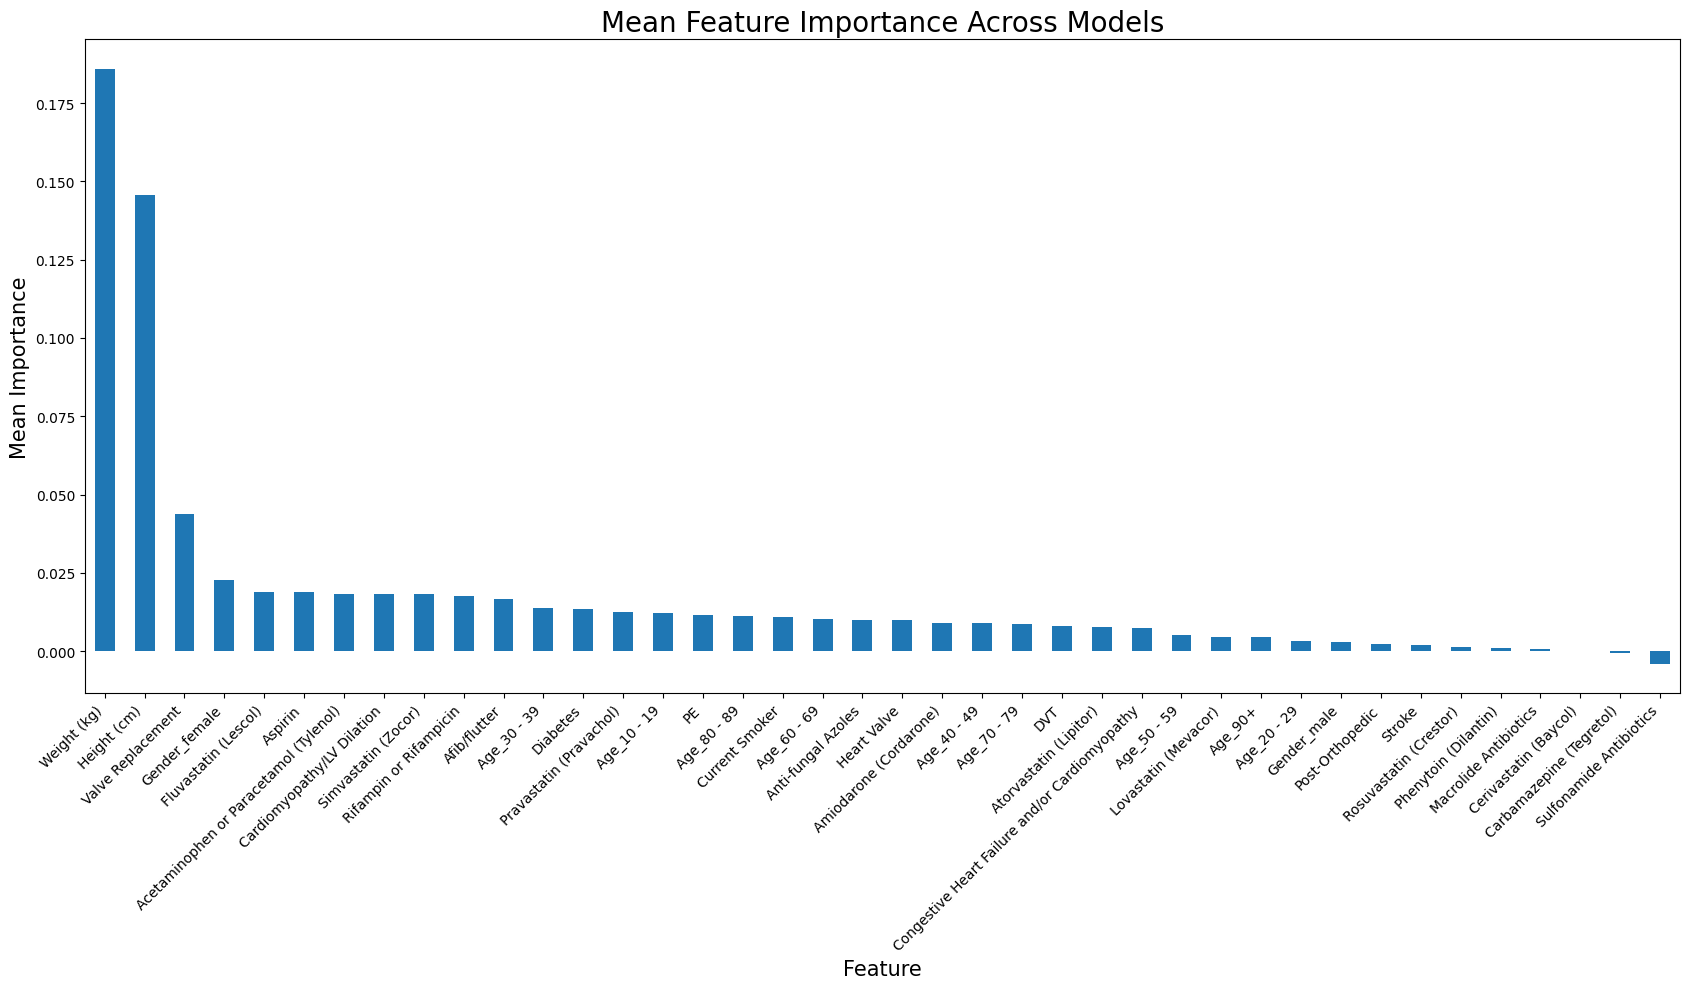

In [25]:
plot_importance(
    importance=importance_df,
    plot_type='bar'
)

## Box Plot

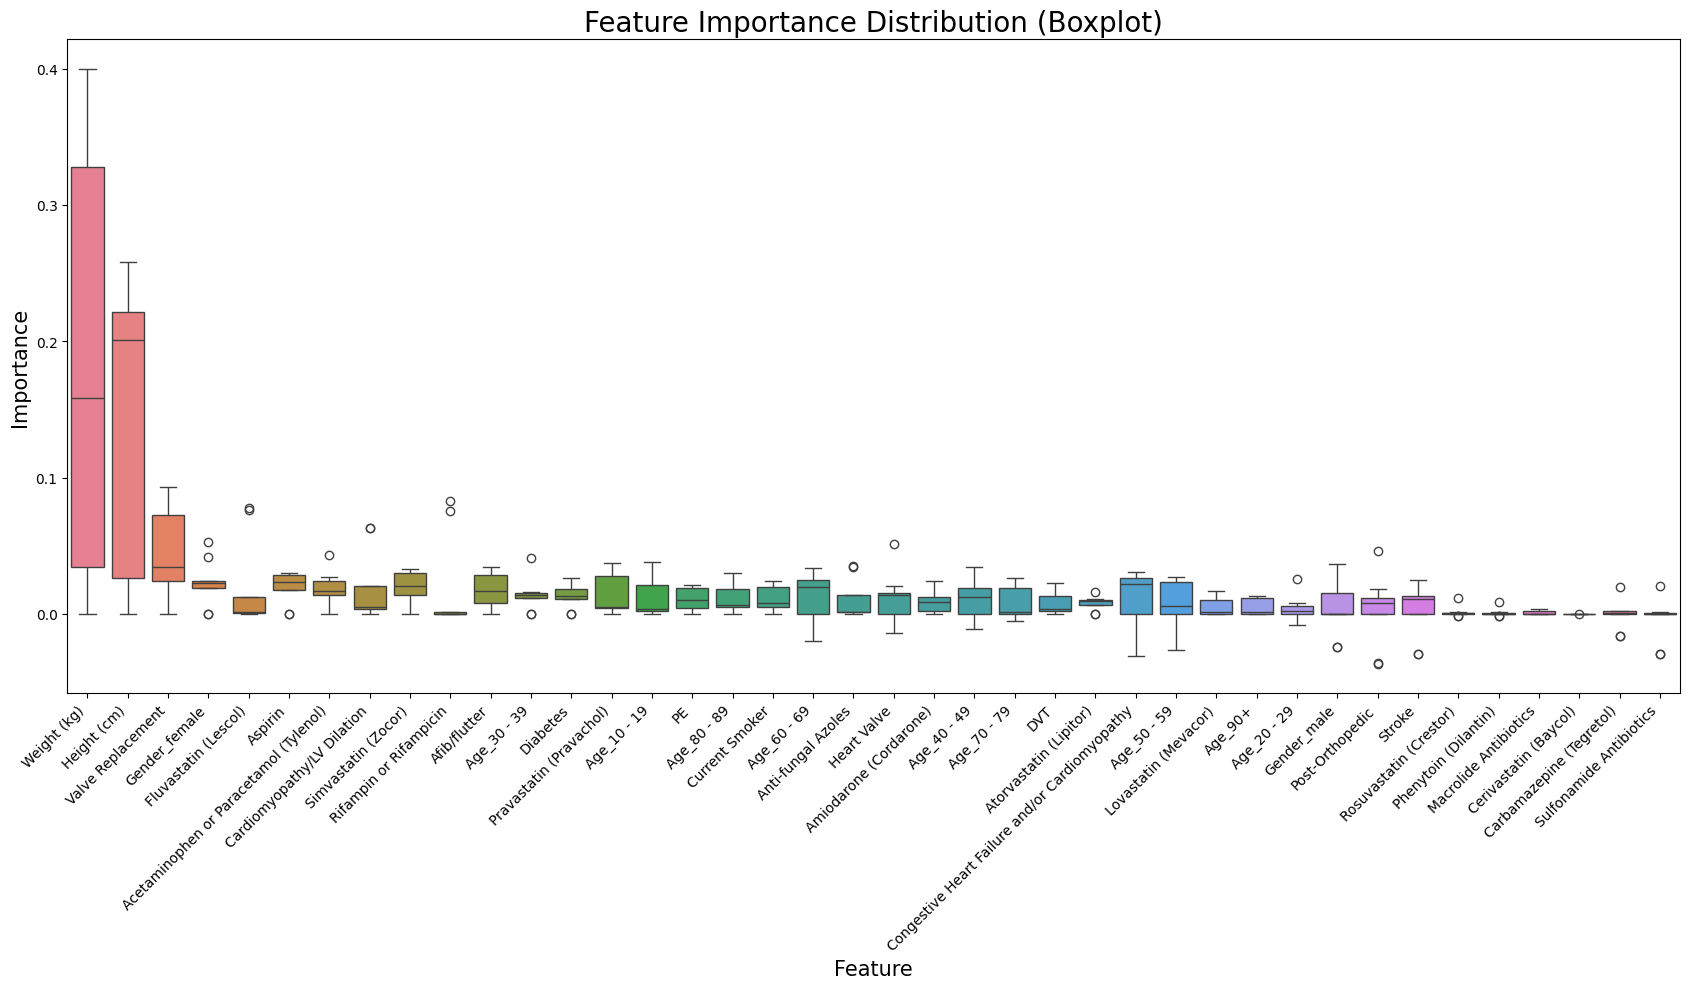

In [26]:
plot_importance(
    importance=importance_df,
    plot_type='box'
)

## Top 10 Feature Importances by Model

<Figure size 1700x1000 with 0 Axes>

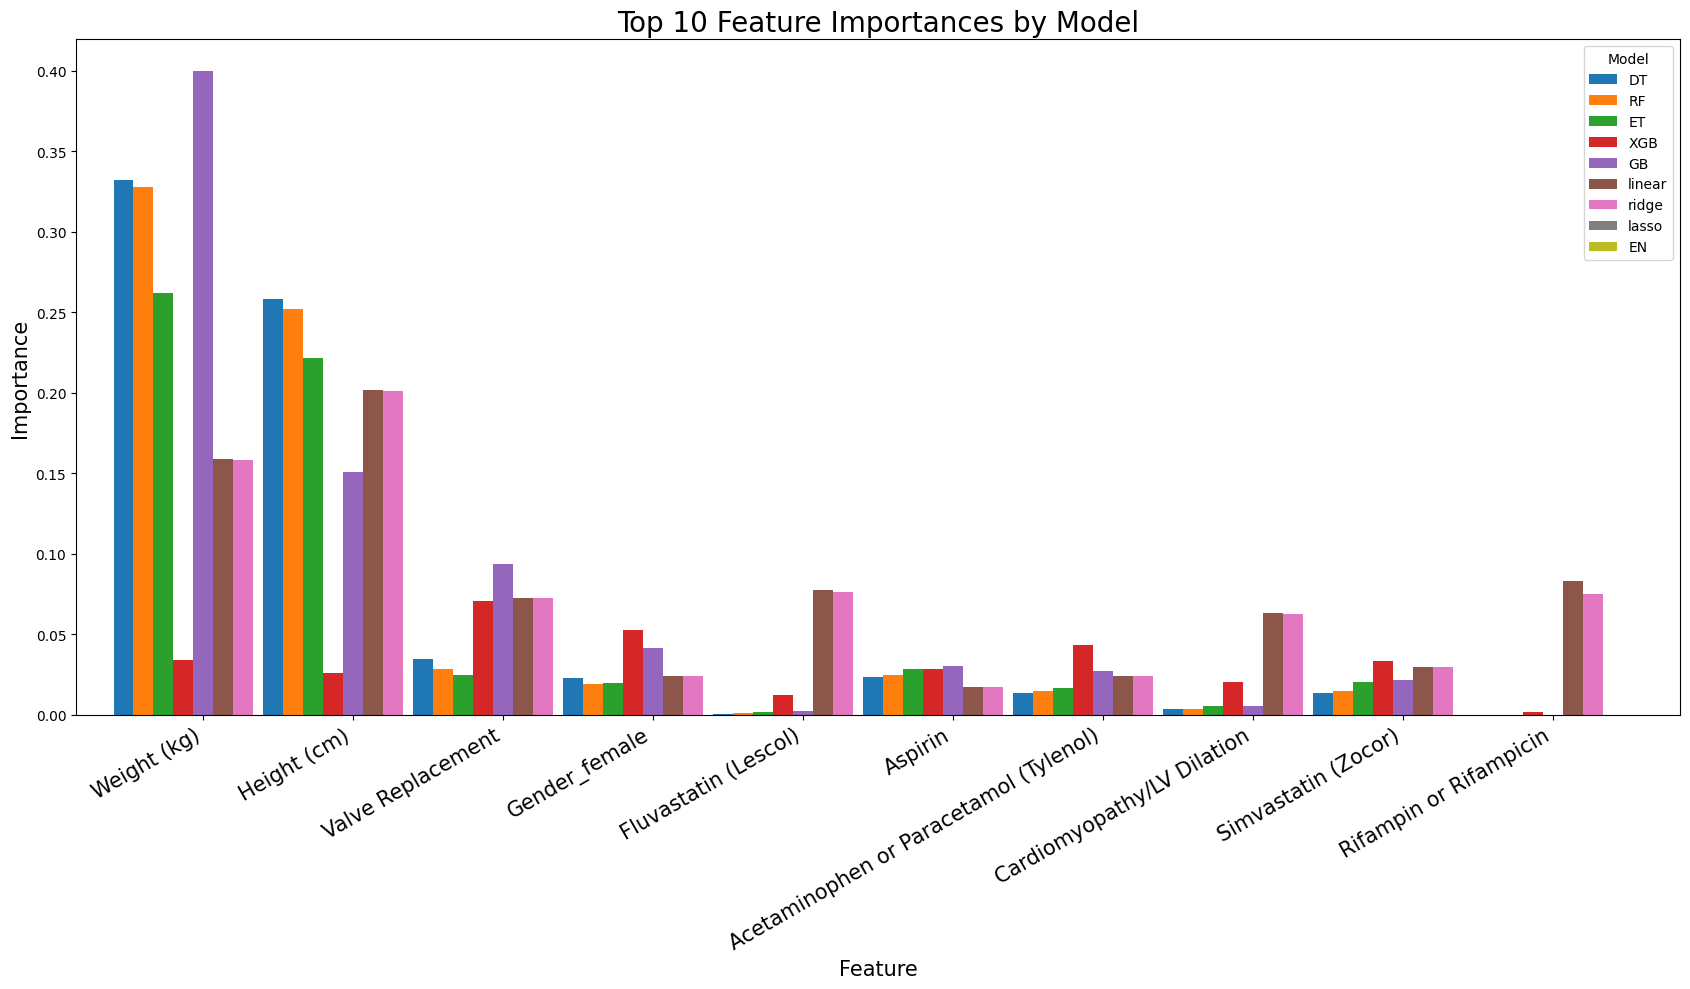

In [27]:
plot_importance(
    importance=importance_df,
    plot_type='top'
)

---
# 5. Feature Selection Report for INR Prediction (Neural Network)
---

### Core Features (High Predictive Value)
- **Weight (kg)**  
- **Height (cm)**  
- **Valve Replacement**  
- **Gender (Male, Female)**  

### Aggregated Age Groups
- **Age < 40**
- **Age 40–69**
- **Age ≥ 70**  

### Additional Predictive Features
- **Fluvastatin (Lescol)**  
- **Aspirin**  
- **Acetaminophen or Paracetamol (Tylenol)**  
- **Simvastatin (Zocor)**  
- **Cardiomyopathy/LV Dilation**  
- **Rifampin or Rifampicin**  
- **Diabetes**  
- **Afib/flutter**
- **Current Smoker**
- **PE**
- **Anti-fungal Azoles**
- **Heart Valve**

In [28]:
# Compress Age Group to 3 Bins
# df['Age 50-'] = df[['Age_10 - 19', 'Age_20 - 29', 'Age_30 - 39', 'Age_40 - 49']].sum(axis=1)
# df['Age 50-69'] = df[['Age_50 - 59', 'Age_60 - 69']].sum(axis=1)
# df['Age 70+'] = df[['Age_70 - 79', 'Age_80 - 89', 'Age_90+']].sum(axis=1)

# df.drop(columns=[col for col in df.columns if col.startswith('Age_')], inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3989 entries, PA135312261 to PA152407685
Data columns (total 44 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Height (cm)                                     3989 non-null   float64
 1   Weight (kg)                                     3989 non-null   float64
 2   Subject Reached Stable Dose of Warfarin         3989 non-null   float64
 3   Therapeutic Dose of Warfarin                    3989 non-null   float64
 4   INR on Reported Therapeutic Dose of Warfarin    3989 non-null   float64
 5   Diabetes                                        3989 non-null   float64
 6   Congestive Heart Failure and/or Cardiomyopathy  3989 non-null   float64
 7   Valve Replacement                               3989 non-null   float64
 8   Aspirin                                         3989 non-null   float64
 9   Acetaminophen or Paracetamol 

In [30]:
selected_features = [
    # Target variable
    "INR on Reported Therapeutic Dose of Warfarin",
    "Therapeutic Dose of Warfarin",
    
    # Core physiological and demographic features
    "Weight (kg)",
    "Height (cm)",
    "Valve Replacement",
    "Gender_male",
    "Gender_female",
    
    # Aggregated age groups
    # "Age 50-",
    # "Age 50-69",
    # "Age 70+",
    "Age_10 - 19",
    "Age_20 - 29",
    "Age_30 - 39",
    "Age_40 - 49",
    "Age_50 - 59",
    "Age_60 - 69",
    "Age_70 - 79",
    "Age_80 - 89",
    "Age_90+",

    # Additional predictive features
    "Fluvastatin (Lescol)",
    "Aspirin",
    "Acetaminophen or Paracetamol (Tylenol)",
    "Simvastatin (Zocor)",
    "Cardiomyopathy/LV Dilation",
    "Rifampin or Rifampicin",
    "Diabetes",
    "Anti-fungal Azoles",
    "Heart Valve",
    "PE",
    "Current Smoker",
    "Afib/flutter",
]

---
# 6. Save Training Data for Neural Network
--- 

In [31]:
df = df[selected_features]
df

,INR on Reported Therapeutic Dose of Warfarin,Therapeutic Dose of Warfarin,Weight (kg),Height (cm),Valve Replacement,Gender_male,Gender_female,Age_10 - 19,Age_20 - 29,Age_30 - 39,...,Acetaminophen or Paracetamol (Tylenol),Simvastatin (Zocor),Cardiomyopathy/LV Dilation,Rifampin or Rifampicin,Diabetes,Anti-fungal Azoles,Heart Valve,PE,Current Smoker,Afib/flutter
PharmGKB Subject ID,,,,,,,,,,,,,,,,,,,,,
PA135312261,2.60,49.00,115.70,193.04,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA135312262,2.15,42.00,144.20,176.53,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PA135312263,1.90,53.00,77.10,162.56,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA135312264,2.40,28.00,90.70,182.24,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PA135312265,1.90,42.00,72.60,167.64,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA152407680,3.00,35.00,86.36,165.10,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
PA152407682,2.80,27.51,55.91,160.02,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PA152407683,2.00,57.47,97.73,187.96,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
df.to_csv('datasets/NN_Training_Data.csv', index=False)